In [2]:
# Run in wasp environment
%run -i 'surfacedef2los.py'
import xarray as xr
import rioxarray
import pygmt

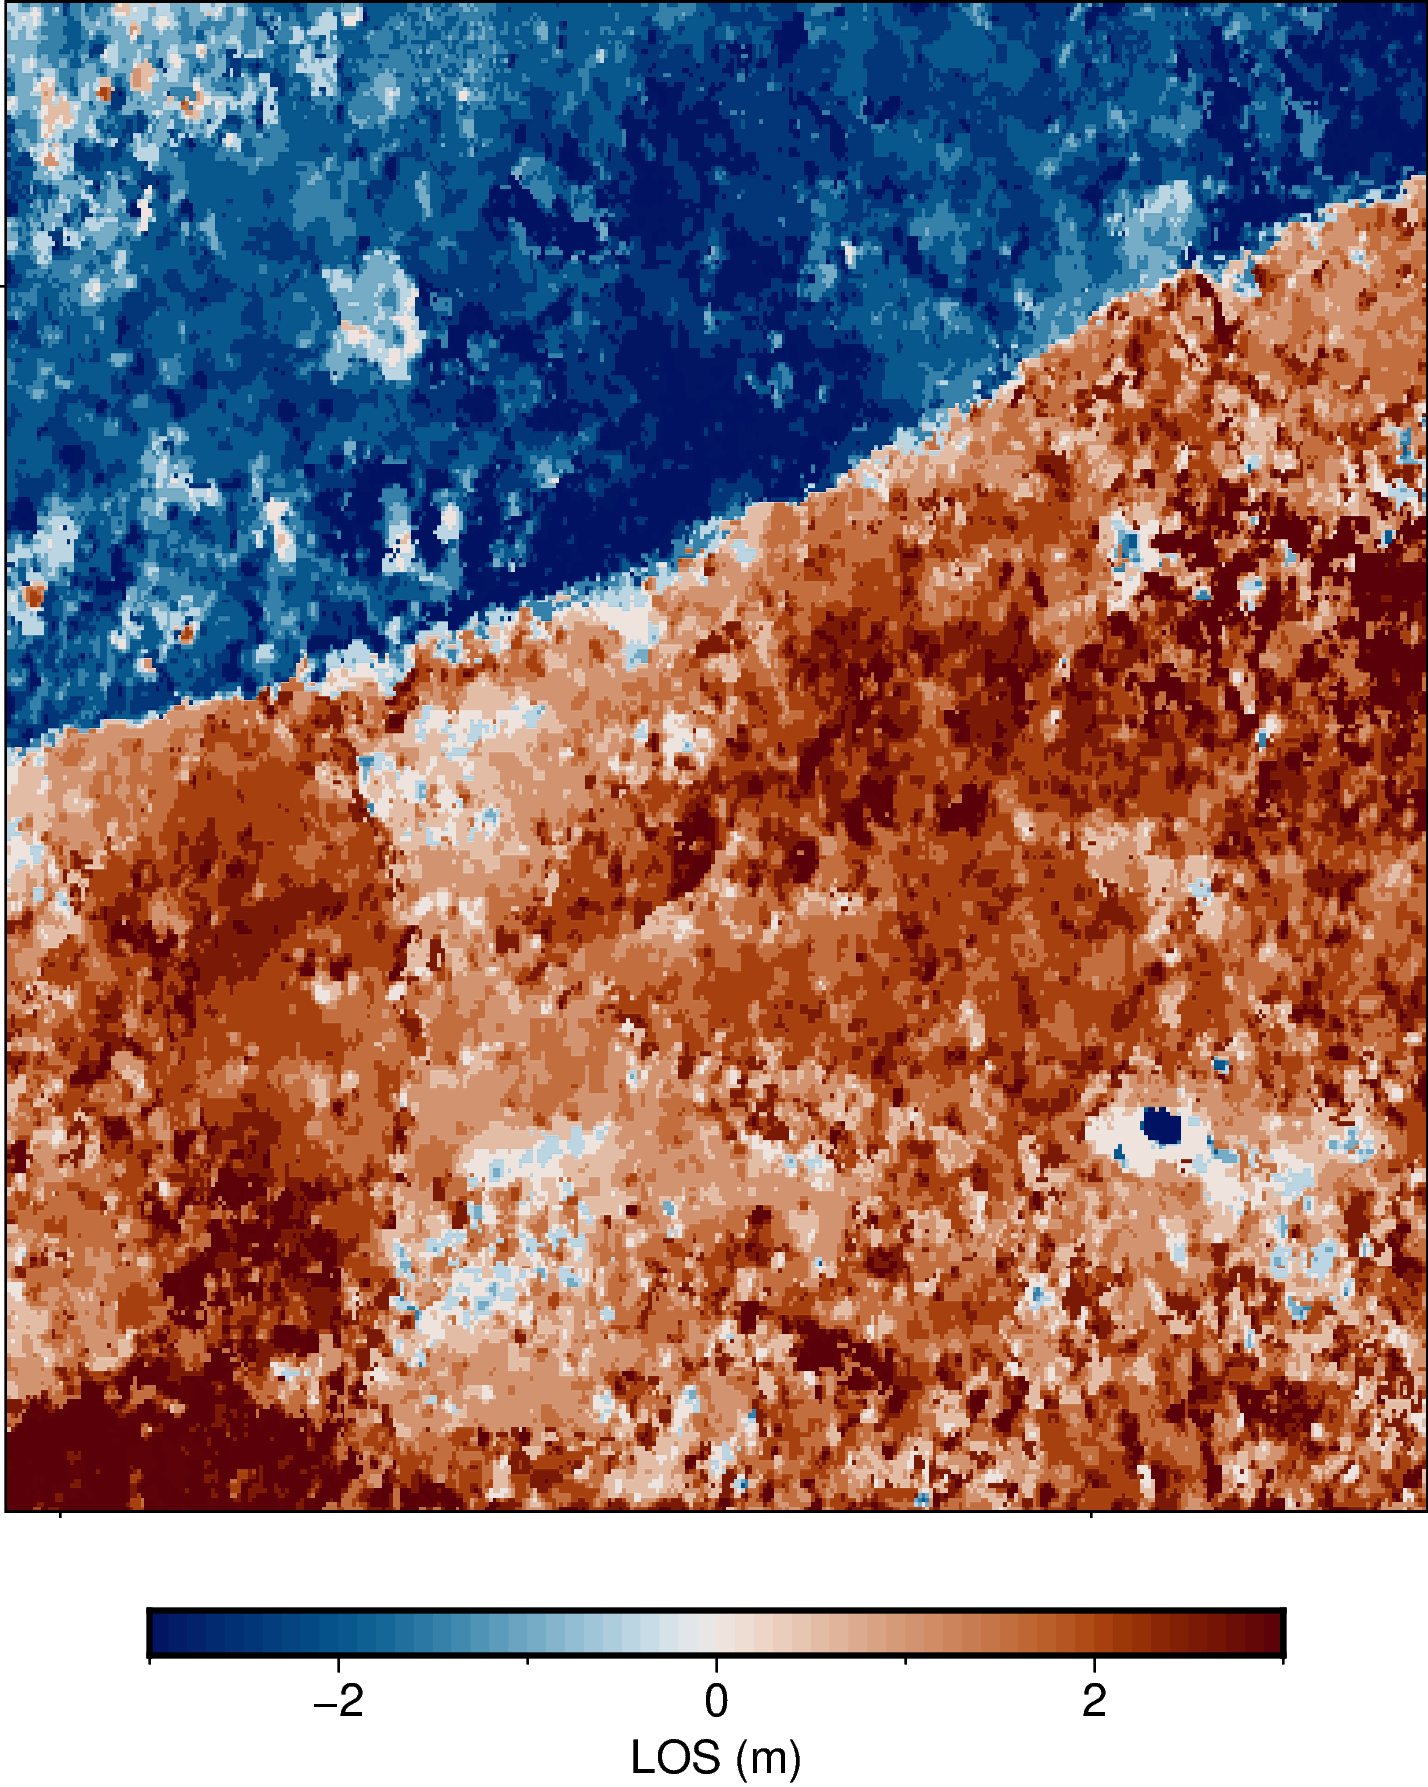

In [18]:
# plot the Pixel offsets geotiff 
geotiff_file = '/Users/hyin/yin_usgs/turkiye_2023/surfacedef2LOS/observation-files/optical-pixel-offsets/Sent2offsets_20220517-20230502_Cankara_EW_meters.tif'

# set the region
cankara_rgn = [37.79494491, 37.93235509,37.80594492, 37.92175508]
eq_region = [35.5, 38.5, 36, 38.5]

region = cankara_rgn

grid = geotiff_file

# set the projection to mercator 0/0 projection with 20cm height
projection = 'M0/0/12c'

# Plot
fig = pygmt.Figure()
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain", FONT="11p")
pygmt.makecpt(cmap="vik", series=[-3, 3, 0.1])
fig.basemap(region=region, projection=projection, frame=["a0.5f0.1"])

fig.grdimage(
    grid=grid,
    projection=projection,
    cmap=True,
)

fig.coast(shorelines=False, region=region, projection=projection, water='204/212/219')
fig.colorbar(frame="af+lLOS (m)")
fig.show()



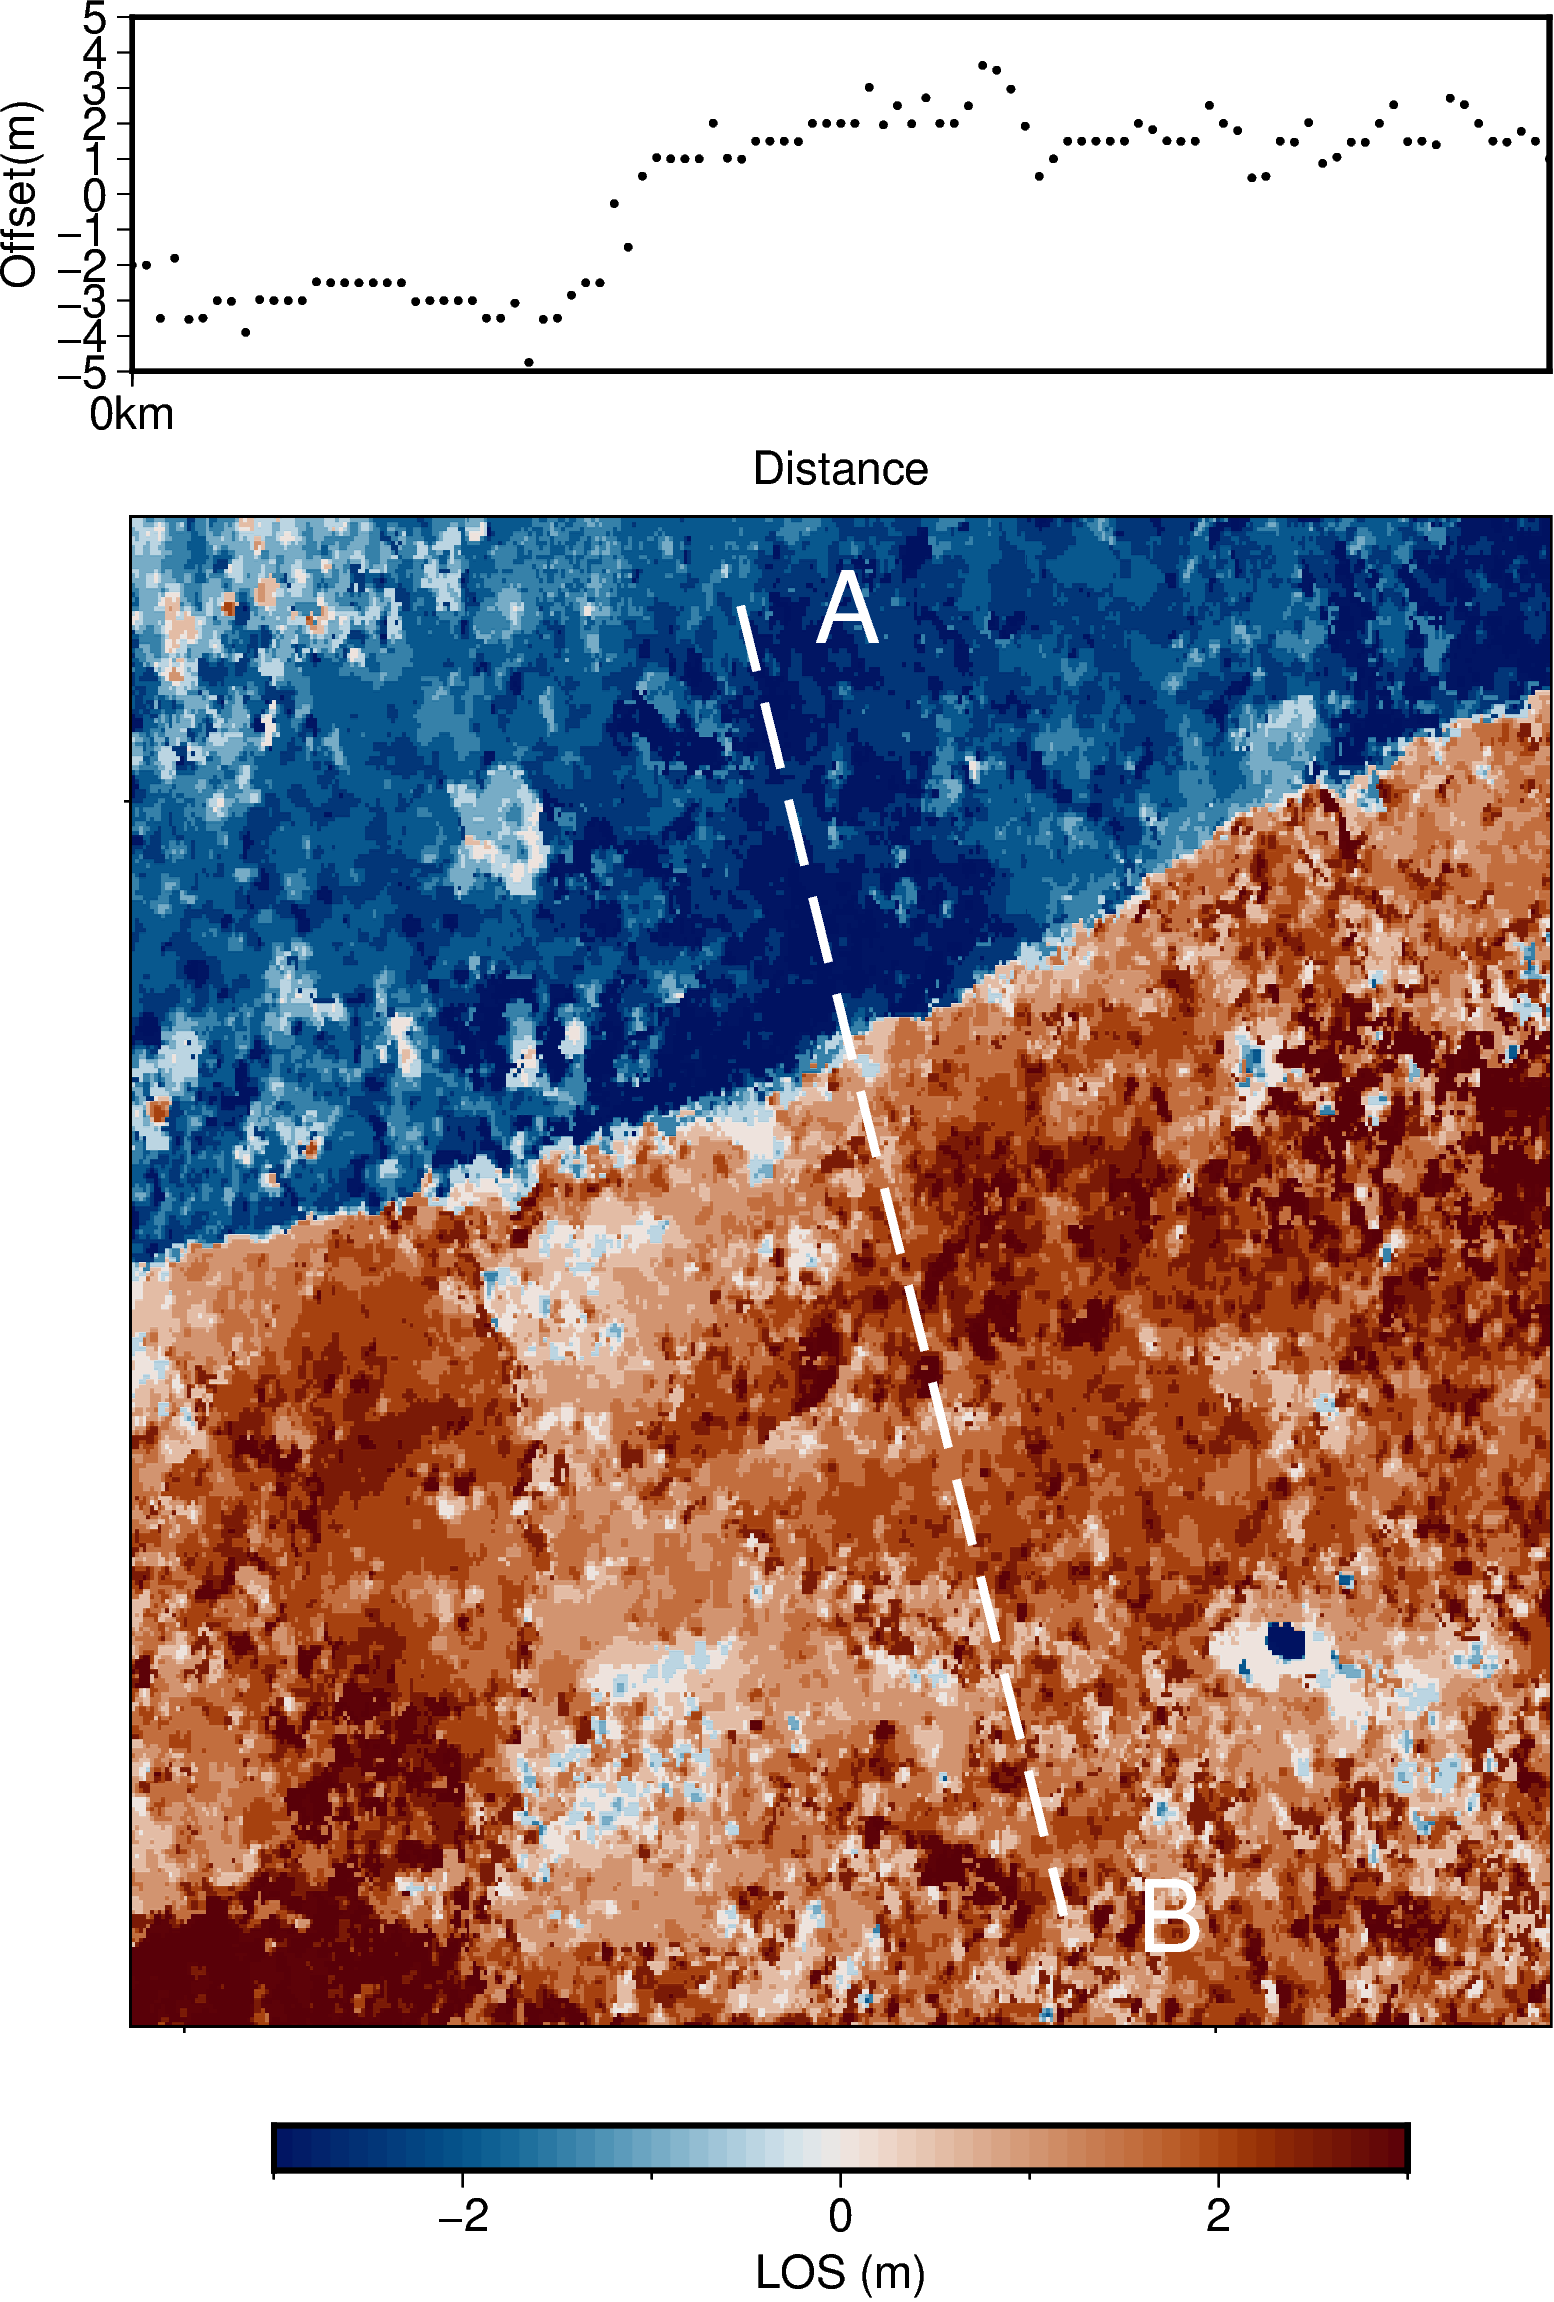

,r,s,p,elevation
0,37.853930,37.914990,0.000000,-2.000000
1,37.854233,37.914019,0.001000,-2.000000
2,37.854536,37.913048,0.002000,-3.503390
3,37.854839,37.912077,0.003000,-1.802329
4,37.855142,37.911106,0.004000,-3.532926
...,...,...,...,...
100,37.884181,37.817883,0.100000,1.000000
101,37.884483,37.816912,0.101000,1.500000
102,37.884785,37.815941,0.102000,2.000000
103,37.885087,37.814970,0.103000,1.016385


In [49]:
# Cross section attempt

projection = 'M0/0/12c'

# Set up main plot
fig = pygmt.Figure()

# ----------------------------------------------------------------------------
# Bottom: Map of elevation in study area
# ----------------------------------------------------------------------------

pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain", FONT="11p")
pygmt.makecpt(cmap="vik", series=[-3, 3, 0.1])
fig.basemap(region=region, projection=projection, frame=["a0.5f0.1"])

fig.grdimage(
    grid=grid,
    projection=projection,
    cmap=True,
)


# Choose a survey line

#NW points(lat,lon): 37.91499,37.85393
#SE point(lat,lon): 37.81435,37.88528
fig.plot(
    y=[37.91499, 37.81435],  # Latitude in degrees North
    x=[37.85393, 37.88528],  # Longitude in degrees East
    # Draw a 2-points thick red dashed line for the survey line
    pen="2p,white,dashed",
)

# Add labels "A" and "B" for the start and end points of the survey line
fig.text(
    y=[37.91499, 37.81435],  # Latitude in degrees North
    x=[37.85393, 37.88528],  # Longitude in degrees East
    text=["A", "B"],
    offset="0.9c/0c",  # Move text 0.9 centimeters to the right (x direction)
    font="24p,white",  # Use a font size of 15 points
)

fig.coast(shorelines=False, region=region, projection=projection, water='204/212/219')
fig.colorbar(frame="af+lLOS (m)")


# ----------------------------------------------------------------------------
# Top: Elevation along survey line
# ----------------------------------------------------------------------------


# Shift plot origin 21 centimeters to the top
fig.shift_origin(yshift="14c")

fig.basemap(
    region=[0, .1, -5, 5],  # x_min, x_max, y_min, y_max
    # Cartesian projection with a width of 12 centimeters and
    # a height of 3 centimeters
    projection="X12c/3c",
    # Add annotations ("a") and ticks ("f") as well as labels ("+l")
    # at the west or left and south or bottom sides ("WSrt")
    frame=["WSrt", "xa1k+lDistance+ukm", "ya1+lOffset(m)"],
)

#NW points(lat,lon): 37.91499,37.85393
#SE point(lat,lon): 37.81435,37.88528
# Generate points along a great circle corresponding to the survey line
# and store them in a pandas.DataFrame
track_df = pygmt.project(
    center="37.85393/37.91499",  # Start point of survey line (longitude/latitude)
    endpoint="37.88528/37.81435",  # End point of survey line (longitude/latitude)
    generate="0.001",  # Output data in steps of 0.1 degrees
)

# Extract the elevation at the generated points from the downloaded grid
# and add it as new column "elevation" to the pandas.DataFrame
track_df = pygmt.grdtrack(
    grid=grid,
    points=track_df,
    newcolname="elevation",
)

# Plot elevation along the survey line
fig.plot(
    x=track_df.p,
    y=track_df.elevation,
    fill="black",
    pen="1p,black,solid",
    style="c1p",
)

fig.show()
track_df


In [39]:
## Attempting a new plot with pygmt crossprofile
# https://www.pygmt.org/latest/api/generated/pygmt.grdtrack.html#pygmt.grdtrack

# Extract the elevation at the generated points from the downloaded grid
# and add it as new column "elevation" to the pandas.DataFrame
track_df_cross = pygmt.grdtrack(
    grid=grid,
    # length of profile/ sampling space along each profile / spacing between crossprofiles
    crossprofile='5k/.1/1k', 
    points=track_df,
    newcolname="ew_offset_m",
)
track_df_cross

# # Plot elevation along the survey line
# fig.plot(
#     x=track_df.p,
#     y=track_df.elevation,
#     fill="gray",  # Fill the polygon in "gray"
#     # Draw a 1-point thick black solid outline
#     pen="1p,black,solid",
#     close="+y-8000",  # Force closed polygon
# )
# fig.show()


,r,s,p,elevation,ew_offset_m
0,> Cross profile number -L0-000 at 37.854/037...,NaN,NaN,NaN,NaN
1,37.8816046846,37.920360,-2.503823,256.191221,-2.501570
2,37.8804976196,37.920145,-2.403670,256.191221,-2.000000
3,37.8793905611,37.919930,-2.303517,256.190541,-2.500000
4,37.8782835091,37.919716,-2.203364,256.189861,-2.000000
...,...,...,...,...,...
5455,37.8620661856,37.809841,2.103194,256.179904,2.801899
5456,37.8609608366,37.809626,2.203346,256.179226,3.000000
5457,37.859855494,37.809411,2.303498,256.178549,0.679779
5458,37.8587501579,37.809196,2.403650,256.177871,0.500000


In [7]:

# da = rioxarray.open_rasterio(geotiff_file)          # Open the data array with rioxarray

# observed_ds = da.to_dataset('band')          # Convert to dataset and take the band object and set it as a variable
# observed_ds = observed_ds.rename({1: 'offset','x': 'lon','y': 'lat'})          # Rename the variable to a more useful name
# print(observed_ds.lon.min())
# print(observed_ds.lon.max())

# # # NaNs are read in as -140000 by default so let's convert all of these to NaNs 
# # observed_ds = observed_ds.where(observed_ds != -140000)          # replace all values equal to -140000 with NaNs 
# # observed_ds = observed_ds.where(observed_ds != -23000)          # replace all values equal to -140000 with NaNs 

# observed_ds.offset.plot()